# Simple Linear Regression with Python Scikit-learn
In this problem we will use Python Scikit-learn library for learning to implement regression function.
As a starter we will use a dataset with only two variable, train a model on that and predict a value.
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Task 1 By Krishna Bisen

## Data Importing and cleaning

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Data
data_url = 'http://bit.ly/w-data'
df = pd.read_csv(data_url)

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours studied vs Score obtained')

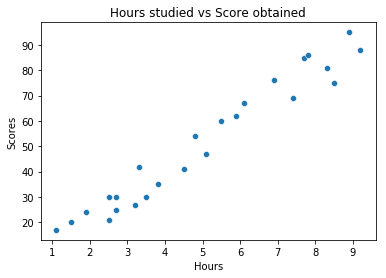

In [6]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title('Hours studied vs Score obtained')

A linear positive corelation can be seen between the two variables.

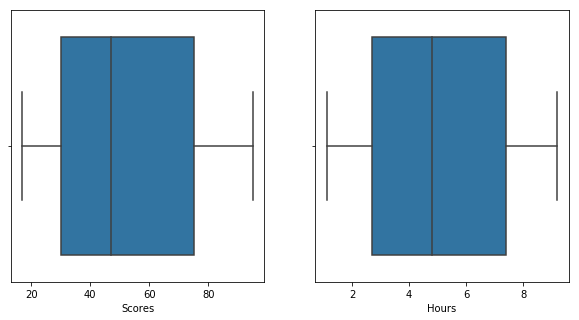

In [7]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Scores'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Hours'])

Dataset has no outliers.

## Model Building

In [8]:
from sklearn.linear_model import LinearRegression # For Simple Linear Regression
from sklearn.model_selection import cross_val_score # For cross validation of model
from sklearn.neighbors import KNeighborsRegressor # For KNN Regression
from sklearn.model_selection import LeaveOneOut # Since our dataset is small we will use LeaveOneOut Cross Validation.

In [9]:
X = df['Hours'].values.reshape(-1,1) # Linear Regression does not take 1-D array for value of X.
y = df['Scores']

In [10]:
knn_rmse= []
for K in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = K)
    rmse = cross_val_score(knn, X, y, scoring = 'neg_mean_squared_error', cv=LeaveOneOut())
    rmse= np.sqrt(np.mean(np.absolute(rmse)))
    knn_rmse.append(rmse)
    print('RMSE value for k= ' , K , 'is:', rmse) # Print RMSE for all values of K

RMSE value for k=  1 is: 8.55102333057278
RMSE value for k=  2 is: 7.98060148109151
RMSE value for k=  3 is: 6.520395352703359
RMSE value for k=  4 is: 6.922607890094599
RMSE value for k=  5 is: 6.864167830116043
RMSE value for k=  6 is: 6.380961265096871
RMSE value for k=  7 is: 6.157126284366161
RMSE value for k=  8 is: 6.549570596611659
RMSE value for k=  9 is: 7.46312746808858


In [11]:
elbow_curve = pd.DataFrame(knn_rmse)

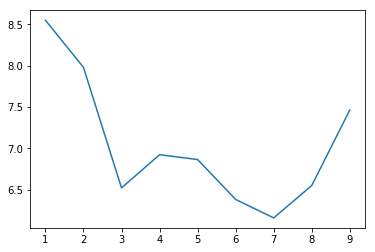

In [12]:
plt.plot(elbow_curve)
plt.xticks(np.arange(len(elbow_curve)), np.arange(1, len(elbow_curve)+1)); # Generating Elbow curve to decide best value of K.

In [13]:
lr = LinearRegression()

In [14]:
scores = cross_val_score(lr,X = X ,y = y, cv = LeaveOneOut(), scoring = 'neg_mean_squared_error')

In [15]:
np.sqrt(np.mean(np.absolute(scores)))

5.863106638620912

Value of RMSE is lower for Linear Regression hence we go with Simple Linear Regressoin

In [16]:
lr.fit(X, y) # Fit data in the Linear Regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predicting a value

In [17]:
# Predicting score of a student based on how many hours he/she studies per day.
X1 = [float(input('How many hours the student studies per day:'))]
y1 = round(lr.predict([X1])[0],2)
print('The predicted score if student studies for '+str(X1)+' hrs/day is ' + str(y1))

How many hours the student studies per day:9.25
The predicted score if student studies for [9.25] hrs/day is 92.91


### Methamatical Intuition behind the Algorithm

y = $B_{0}$ + $B_{1}X_{1}$ this is the formula that is used in Simple Linear Regression.

In [18]:
lr.intercept_ # Value of B0

2.483673405373196

In [19]:
lr.coef_ # Value of B1

array([9.77580339])

In [20]:
lr.intercept_ + lr.coef_*9.25

array([92.90985477])

As we can see the value we got mathematically here is same as it was predicted by algorithm.

# Thank you